<center><img src="https://btchekeli.github.io/src/My_logos/logo_principal_HB.png" style="height:300px"></center>
<div class="alert alert-info" role="alert">
  <center><h6 id="Python-pour-la-Data-Science">La donnée est l’actif stratégique de la révolution numérique</h6></center>
</div>

<hr style="border-width:2px;border-color:#75DFC1">
    <center><h2>Rapide analyse des déposants de brevets par pays</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

- Source du jeux de données : https://data.enseignementsup-recherche.gouv.fr/explore/dataset/deposants-des-brevets/
- Source des informations : documentation_jeux de donnes_brevets (https://data.enseignementsup-recherche.gouv.fr/explore/dataset/deposants-des-brevets/)

<blockquote style="border-left: 5px solid #686a91;">
    <p><b>key_appln_nr</b> ==> Identifiant unique constitué de l’autorité qui a reçu la demande, du numéro de demande auprès de l’autorité, du type de la demande, de l’autorité qui a reçu la demande internationale </p>
    <p><b>nr_famille_docdb</b> ==> Numéro de la famille DOCDB; au sein d’une famille DOCDB, les différentes demandes partagent exactement les mêmes priorités</p>
   <p><b> nom_demandeur</b> ==> Nom standardisé du déposant tel qu’enregistré dans la base de données de l’Office européen des brevets </p>
   <p> <b>code_pays</b> ==> Code pays du déposant</p>
   <p> <b>siren</b> ==> siren</p>
   <p> <b>key_appln_nr_person</b> ==> Identifiant unique constitué de l’autorité qui a reçu la demande, du numéro de demande auprès de l’autorité, du type de la demande, de l’autorité qui a reçu la demande internationale et identifiant de la personne</p>
</blocquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the data with ';' as the delimiter
data = pd.read_csv('./data/deposants-des-brevets.csv', delimiter=';')

# Display the first 5 rows of the dataframe
data.head()


,key_appln_nr,nr_famille_docdb,nom_demandeur,code_pays,siren,key_appln_nr_person
0,RU2013142658A,45928798,ZEDEL S A,FR,411851926.0,RU2013142658A_64658405
1,RU2013144585A,43982459,DOLBI INTERNESHNL AB,NL,NaN,RU2013144585A_69145926
2,RU2013155907A,46456914,SNEKMA,FR,414815217.0,RU2013155907A_64117326
3,RU2014108036A,46724520,SNEKMA,FR,414815217.0,RU2014108036A_64117326
4,RU2014112355A,46829823,SNEKMA,FR,414815217.0,RU2014112355A_64117326


<h2 id="6.-La-fonction-enumerate">Analyse descriptive</h2>
<h6 id="6.-La-fonction-enumerate">Comprendre la distribution des données, les valeurs manquantes, les valeurs uniques</h6>

In [3]:
data_shape = data.shape
data_shape

(650109, 6)

In [4]:
data_shape = data.shape
data_info = data.info()
data_description = data.describe()

data_info
display(data_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650109 entries, 0 to 650108
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   key_appln_nr         650108 non-null  object
 1   nr_famille_docdb     650109 non-null  object
 2   nom_demandeur        650109 non-null  object
 3   code_pays            644743 non-null  object
 4   siren                516113 non-null  object
 5   key_appln_nr_person  650108 non-null  object
dtypes: object(6)
memory usage: 29.8+ MB


,key_appln_nr,nr_famille_docdb,nom_demandeur,code_pays,siren,key_appln_nr_person
count,650108,650109,650109,644743,516113.0,650108
unique,540901,237195,34956,116,22642.0,650108
top,EP14712601A,49624232,COMMISSARIAT ENERGIE ATOMIQUE,FR,775685019.0,RU2013142658A_64658405
freq,22,315,24734,562213,13369.0,1


In [5]:
# Number of unique values in each column
n_unique_values = data.nunique()

# Number of missing values in each column
n_missing_values = data.isnull().sum()

# Most frequent values in each column
most_frequent_values = data.mode().loc[0]

print("-----------------------", "\n", "n_unique_values : ")
print(n_unique_values)
print("-----------------------", "\n","n_missing_values :")
print(n_missing_values)
print("-----------------------", "\n", "most_frequent_values :" )
print(most_frequent_values)



----------------------- 
 n_unique_values : 
key_appln_nr           540901
nr_famille_docdb       237195
nom_demandeur           34956
code_pays                 116
siren                   22642
key_appln_nr_person    650108
dtype: int64
----------------------- 
 n_missing_values :
key_appln_nr                1
nr_famille_docdb            0
nom_demandeur               0
code_pays                5366
siren                  133996
key_appln_nr_person         1
dtype: int64
----------------------- 
 most_frequent_values :
key_appln_nr                             EP14712601A
nr_famille_docdb                            49624232
nom_demandeur          COMMISSARIAT ENERGIE ATOMIQUE
code_pays                                         FR
siren                                    775685019.0
key_appln_nr_person           AP2012006149A_13016672
Name: 0, dtype: object


<div class="alert alert-info">
<i class="fa fa-info-circle"></i>
résumé de l'analyse descriptive de chaque colonne :
</div>
<blockquote style="border-left: 5px solid #686a91;">
    <p>key_appln_nr: 540,901 valeurs uniques, 1 valeur manquante, la valeur la plus fréquente est 'EP14712601A'.</p>
    <p>nr_famille_docdb: 237,195 valeurs uniques, 0 valeur manquante, la valeur la plus fréquente est '49624232'.</p>
    <p>nom_demandeur: 34,956 valeurs uniques, 0 valeur manquante, la valeur la plus fréquente est 'COMMISSARIAT ENERGIE ATOMIQUE'.</p>
   <p> code_pays: 116 valeurs uniques, 5,366 valeurs manquantes, la valeur la plus fréquente est 'FR'.</p>
    <p>siren: 22,642 valeurs uniques, 133,996 valeurs manquantes, la valeur la plus fréquente est '775685019.0'.</p>
    <p>key_appln_nr_person: 650,108 valeurs uniques, 1 valeur manquante, la valeur la plus fréquente est 'AP2012006149A_13016672'.</p>

<p>Comme vous pouvez le voir, la majorité des colonnes ont un grand nombre de valeurs uniques, ce qui signifie qu'il y a une grande diversité de demandeurs de brevets, de numéros d'identification, etc. De plus, certaines colonnes contiennent des valeurs manquantes, ce qui pourrait nécessiter un traitement supplémentaire si nous voulons utiliser ces colonnes pour des analyses plus approfondies.</p>
</blocquote>

<h2 id="6.-La-fonction-enumerate">Analyse par pays : Comprendre le nombre de demandes de brevets par pays.</h2>

In [6]:
# nombre de brevet deposé par pays
patent_by_country = data['code_pays'].value_counts()

# affichons le top 10 des pays ayant déposé le plus de brevtes
patent_by_country.head(10)

FR    562213
US     22778
CH     15196
DE     10769
JP      5220
NL      4474
BE      3262
GB      3241
SE      2185
CA      1830
Name: code_pays, dtype: int64

Voici les 10 pays avec le plus grand nombre de demandes de brevets dans le jeu de données :
    <blockquote style="border-left: 5px solid #686a91;">
        <p>1. France (FR) : 562,213 demandes</p>
        <p>2. États-Unis (US) : 22,778 demandes</p>
        <p>3. Suisse (CH) : 15,196 demandes</p>
        <p>4. Allemagne (DE) : 10,769 demandes</p>
        <p>5. Japon (JP) : 5,220 demandes</p>
        <p>6. Pays-Bas (NL) : 4,474 demandes</p>
        <p> 7. Belgique (BE) : 3,262 demandes</p>
        <p> 8. Royaume-Uni (GB) : 3,241 demandes</p>
        <p> 9. Suède (SE) : 2,185 demandes</p>
        <p> 10 Canada (CA) : 1,830 demandes</p>
    </blocquote>  
    

<p>Il semble que la France ait le plus grand nombre de demandes de brevets, ce qui est probablement dû au fait que le jeu de données concerne les brevets dont au moins une partie est localisée en France.</p>

<p>Pour une meilleure visualisation, nous pouvons créer un diagramme à barres de ces données. Faisons cela ensuite.</p>

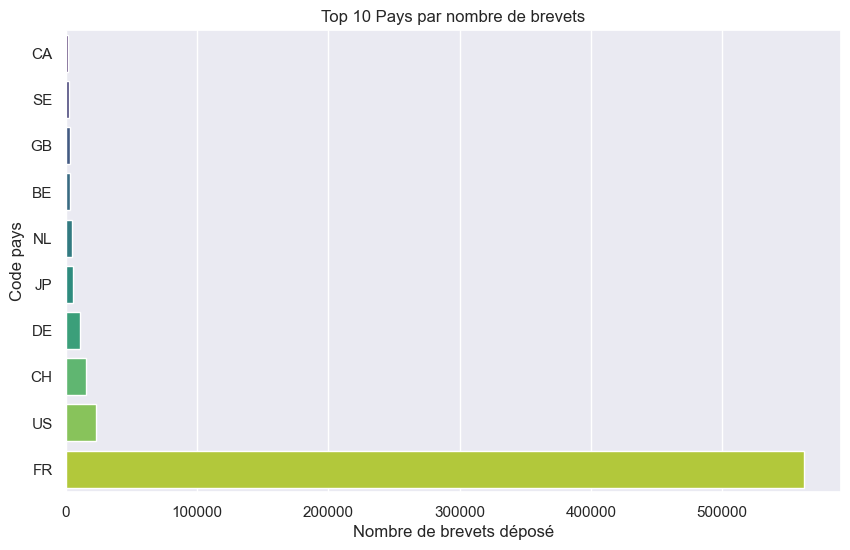

In [7]:
sns.set_theme()
top_countries = patent_by_country.head(10).sort_values()

# graphique à bar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis", orient="h")

plt.xlabel("Nombre de brevets déposé")
plt.ylabel("Code pays")
plt.title("Top 10 Pays par nombre de brevets")
plt.show()

<blockquote style="border-left: 5px solid #686a91;">Le graphique à barres horizontales ci-dessus montre les 10 pays avec le plus grand nombre de demandes de brevets. 
Comme nous l'avons discuté précédemment, la France (FR) a de loin le plus grand nombre de demandes de brevets, suivie par les États-Unis (US), la Suisse (CH), l'Allemagne (DE), et d'autres pays.</blocquote>

<h2 id="6.-La-fonction-enumerate">Analyse par demandeur :</h2> <h6 id="6.-La-fonction-enumerate">Comprendre le nombre de demandes de brevets par demandeur.</h6>

In [8]:
# Nomre de brevets déposé par demandeur
patent_by_applicant = data["nom_demandeur"].value_counts()

# affichage du top 10 
patent_by_applicant.head(10)

COMMISSARIAT ENERGIE ATOMIQUE     24734
CENTRE NAT RECH SCIENT            14842
PEUGEOT CITROEN AUTOMOBILES SA    10408
MICHELIN & CIE                    10243
THALES SA                         10094
INST NAT SANTE RECH MED            9082
SANOFI SA                          7866
AIR LIQUIDE                        7714
RENAULT SA                         7471
SAFRAN AIRCRAFT ENGINES            7289
Name: nom_demandeur, dtype: int64

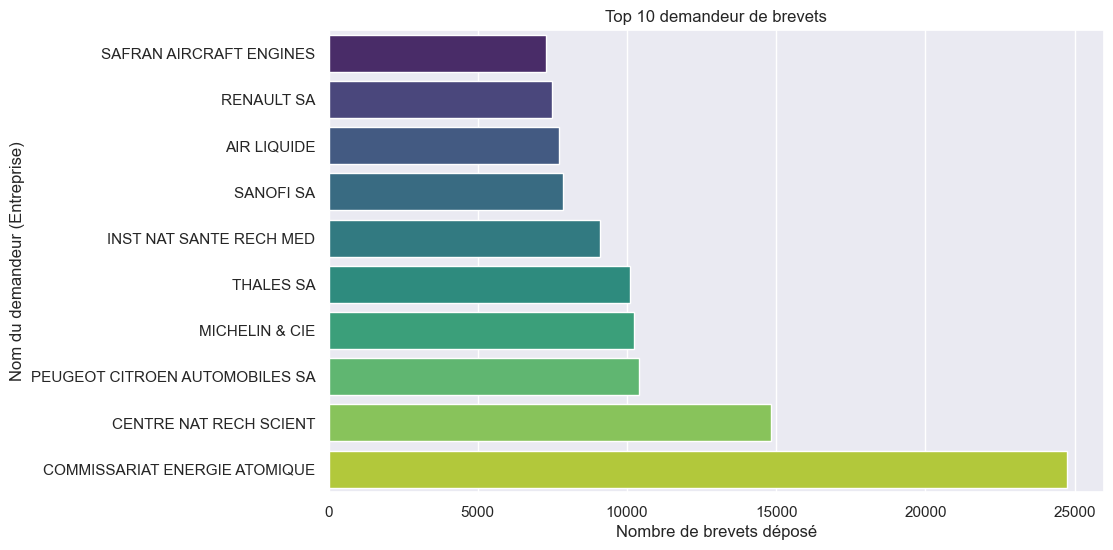

In [9]:
top_applicant = patent_by_applicant.head(10).sort_values()

# graphique à bar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_applicant.values, y=top_applicant.index, palette="viridis", orient="h")

plt.xlabel("Nombre de brevets déposé")
plt.ylabel("Nom du demandeur (Entreprise)")
plt.title("Top 10 demandeur de brevets")
plt.show()

Voici les 10 demandeurs avec le plus grand nombre de demandes de brevets dans le jeu de données :
<blockquote style="border-left: 5px solid #686a91;">
    <p>1.Commissariat à l'énergie atomique (COMMISSARIAT ENERGIE ATOMIQUE) :   ==>    24734 demandes</p>
    <p>2. Centre national de la recherche scientifique (CENTRE NAT RECH SCIENT) :   ==>    14842 demandes</p>
    <p>3. Peugeot Citroën Automobiles SA (PEUGEOT CITROEN AUTOMOBILES SA) :   ==>    10408 demandes</p>
    <p>4. Michelin & Cie (MICHELIN & CIE) :   ==>    10243 demandes</p>
    <p>5. Thales SA (THALES SA) :   ==>    10094 demandes</p>
    <p>6. Institut national de la santé et de la recherche médicale (INST NAT SANTE RECH MED) : 9082 demandes<p>
    <p>7. Sanofi SA (SANOFI SA) :   ==>    7866 demandes</p>
    <p>8. Air Liquide (AIR LIQUIDE) :   ==>    7714 demandes</p>
    <p>9. Renault SA (RENAULT SA) :   ==>    7471 demandes</p>
    <p>10. Safran Aircraft Engines (SAFRAN AIRCRAFT ENGINES) :   ==>    7289 demandes</p>
</blocquote> 

le Commissariat à l'énergie atomique a le plus grand nombre de demandes de brevets, suivi par le Centre national de la recherche scientifique, Peugeot Citroën Automobiles SA, Michelin & Cie, et d'autres organisations.

<h2 id="6.-La-fonction-enumerate">Analyse des demandeurs les plus fréquents par pays : </h2>

Nous avons déjà analysé les demandeurs les plus fréquents dans l'ensemble du jeu de données, mais il pourrait être intéressant de voir quels sont les demandeurs les plus fréquents dans chaque pays. Cela pourrait nous donner une idée des acteurs majeurs de l'innovation dans différents pays.

In [10]:
# Groupons les données par Pays et par demandeur
patent_by_country_applicant = data.groupby(["code_pays", "nom_demandeur"]).size().reset_index(name="count")

# Trie par pays, et suppression des doublons pour obtenirles demandeur avec le plus de brevets dans chaque pays
top_applicant_by_country = patent_by_country_applicant.sort_values(['code_pays', 'count'], ascending=[True, False]).drop_duplicates('code_pays')

# affichage
top_applicant_by_country

,code_pays,nom_demandeur,count
0,AD,SOC DOBRES I TREBALLS SUBTERRANIS DEL PIRINEU ...,1
6,AE,STANLEY BLACK & DECKER MEA FZE,12
8,AF,CLEVEXEL PHARMA,1
9,AM,YEREVAN STATE UNIV,1
17,AR,CONSEJO NACIONAL DE INVESTIGACIONES CIENTIFICA...,14
...,...,...,...
35029,VG,SCHLUMBERGER HOLDINGS,639
35042,VN,INST VIETNAMIEN DE CHIMIE INDUSTRIELLE,2
35045,WO2018062141WEP_68682288,130026149,1
35046,XX,AIRBUS HELICOPTERS,1


<blockquote style="border-left: 5px solid #686a91;">Voici les demandeurs avec le plus grand nombre de demandes de brevets pour chaque pays. Les résultats sont présentés sous la forme d'un dataframe, où chaque ligne correspond à un pays (représenté par son code de pays), et les colonnes indiquent le nom du demandeur avec le plus grand nombre de demandes de brevets dans ce pays et le nombre de ces demandes.</blocquote>

In [11]:
# Selection des top 10 pays
top_10_countries = patent_by_country.head(10).index

# Filtrons
top_applicant_in_top_10_countries = top_applicant_by_country[top_applicant_by_country['code_pays'].isin(top_10_countries)]

# Trie par nombre de brevets déposés
top_applicant_in_top_10_countries_sorted = top_applicant_in_top_10_countries.sort_values('count', ascending=False)

# Display the data
top_applicant_in_top_10_countries_sorted


,code_pays,nom_demandeur,count
9125,FR,COMMISSARIAT ENERGIE ATOMIQUE,24696
1334,CH,MICHELIN RECH TECH,5998
31819,JP,NISSAN MOTOR,2245
2177,DE,CONTINENTAL AUTOMOTIVE GMBH,2230
32525,NL,SCHLUMBERGER TECHNOLOGY BV,1242
34439,US,SAINT GOBAIN ABRASIVES INC,1159
32949,SE,SKF AB,918
31067,GB,VERNALIS R&D LTD,456
446,BE,TOTAL RES & TECHNOLOGY FELUY,399
622,CA,BLACKBERRY LTD,184


Visualisons grace à un graphique à barres groupées ou empilées, et un graphique à bulles

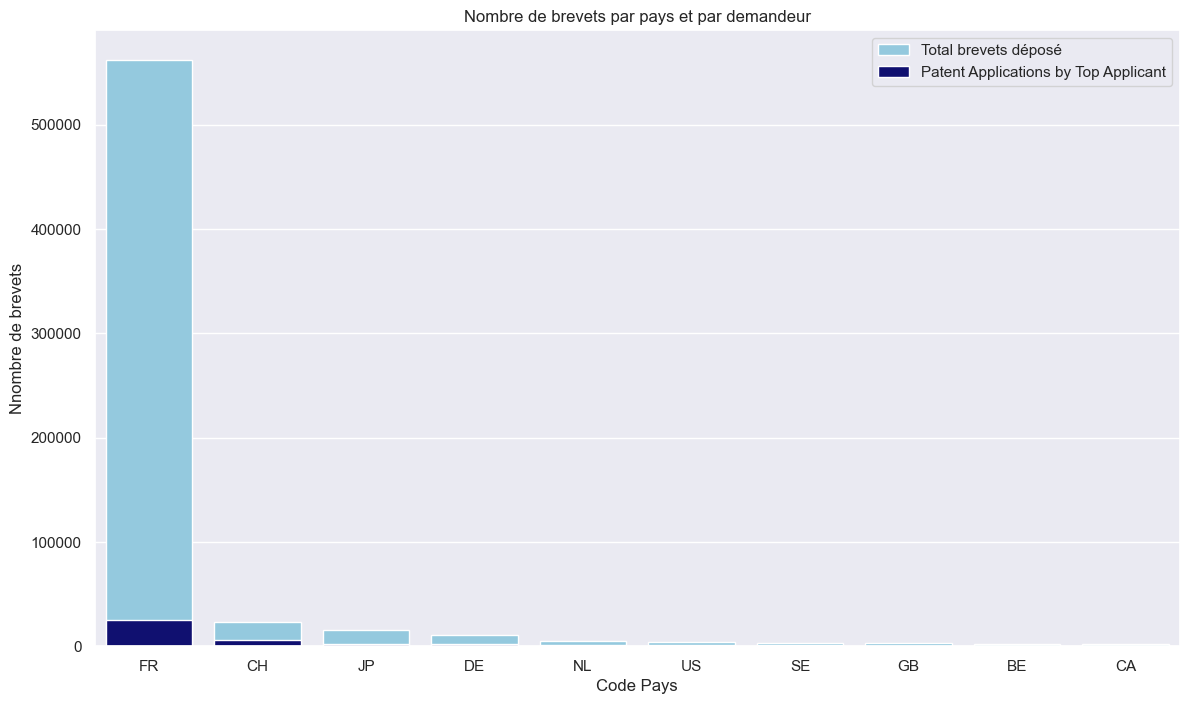

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x=patent_by_country.loc[top_10_countries].index, y=patent_by_country.loc[top_10_countries].values, color='skyblue', ax=ax1, label="Total brevets déposé")

sns.barplot(x=top_applicant_in_top_10_countries_sorted['code_pays'], y=top_applicant_in_top_10_countries_sorted['count'], color='navy', ax=ax1, label="Patent Applications by Top Applicant")

ax1.set_xlabel('Code Pays')
ax1.set_ylabel('Nnombre de brevets')
ax1.set_title('Nombre de brevets par pays et par demandeur')
ax1.legend()

plt.show()


<blockquote style="border-left: 5px solid #686a91;">Le graphique à barres groupées montre le nombre total de demandes de brevets par pays (en bleu clair) et le nombre de demandes de brevets par le demandeur le plus actif dans chaque pays (en bleu marine) pour les 10 pays avec le plus grand nombre de demandes de brevets.

Comme vous pouvez le voir, dans la plupart des pays, le demandeur le plus actif représente une petite portion du nombre total de demandes de brevets. Cela indique que la majorité des demandes de brevets proviennent d'un large éventail de demandeurs plutôt que d'un petit nombre d'acteurs dominants.</blocquote>

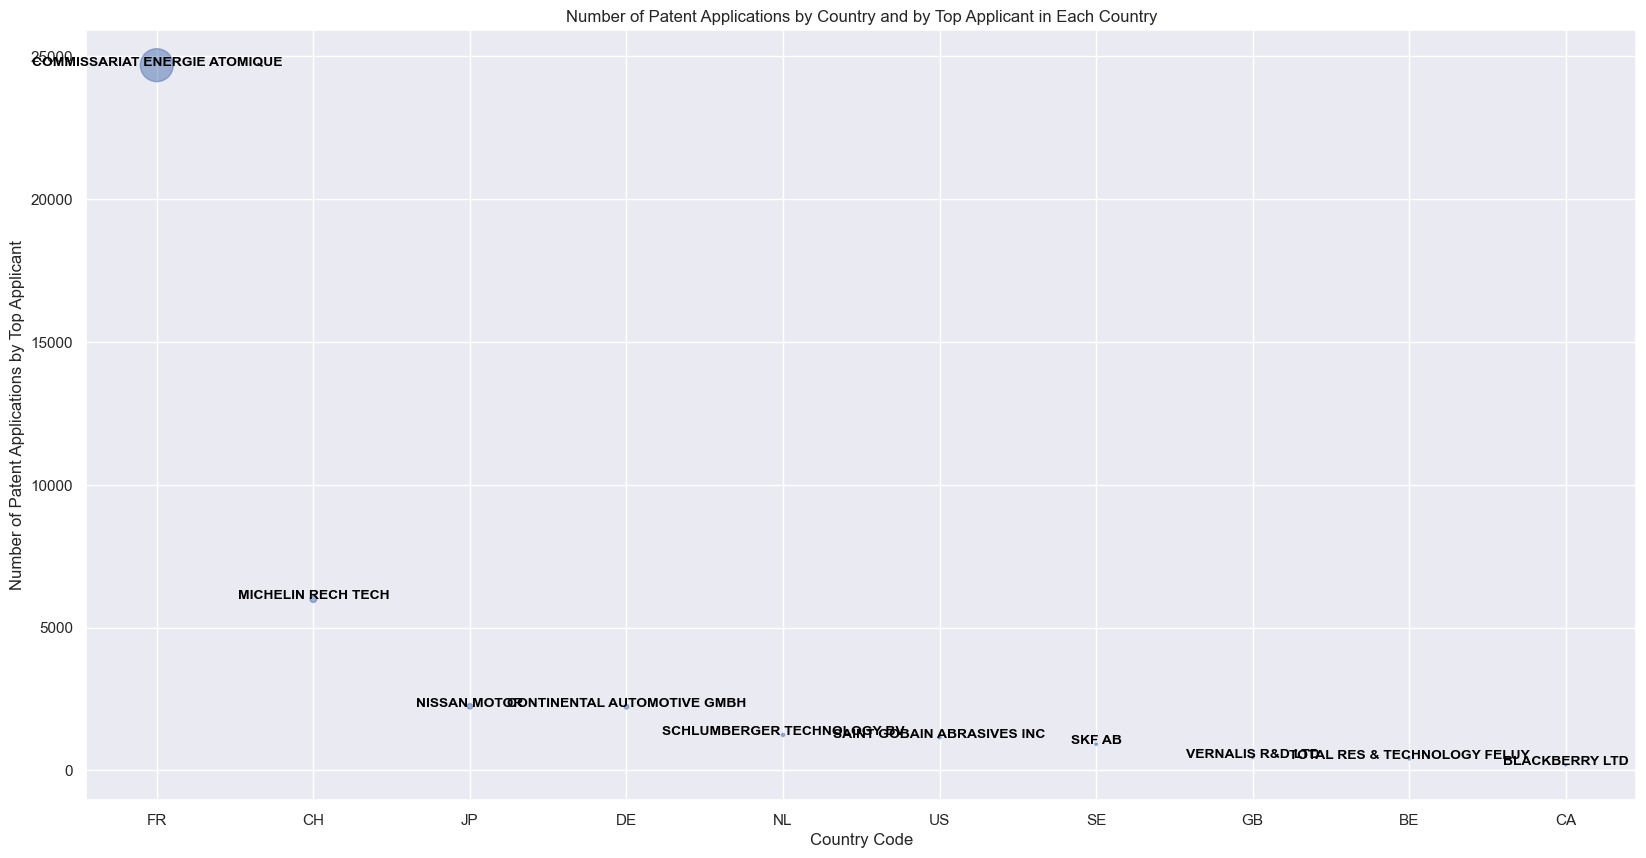

In [13]:
# Creation d'un graphique à bulle pour le nombre de brevets déposé par pays et par top demandeur

fig, ax = plt.subplots(figsize=(20, 10))

# La taille de la bulle représente le nombre total de demandes de brevet dans chaque pays
scatter = ax.scatter(x=top_applicant_in_top_10_countries_sorted['code_pays'], 
                     y=top_applicant_in_top_10_countries_sorted['count'], 
                     s=patent_by_country.loc[top_10_countries].values/1000, # Scale down the size for better visualization
                     alpha=0.5)

# Add labels to the bubbles
for line in range(0,top_applicant_in_top_10_countries_sorted.shape[0]):
     ax.text(top_applicant_in_top_10_countries_sorted['code_pays'].iloc[line], 
             top_applicant_in_top_10_countries_sorted['count'].iloc[line], 
             top_applicant_in_top_10_countries_sorted['nom_demandeur'].iloc[line], 
             horizontalalignment='center', 
             size='small', 
             color='black', 
             weight='semibold')

# Set the labels and title
ax.set_xlabel('Country Code')
ax.set_ylabel('Number of Patent Applications by Top Applicant')
ax.set_title('Number of Patent Applications by Country and by Top Applicant in Each Country')

plt.show()


<blockquote style="border-left: 5px solid #686a91;">Voici un graphique à bulles (pas très lisible) montrant le nombre de demandes de brevets par le demandeur le plus actif dans chaque pays (sur l'axe des y), pour les 20 pays avec le plus grand nombre de demandes de brevets (représentés par le code du pays sur l'axe des x). La taille de chaque bulle représente le nombre total de demandes de brevets dans le pays correspondant.

Comme vous pouvez le voir, la taille des bulles varie considérablement d'un pays à l'autre, reflétant les différences dans le nombre total de demandes de brevets. De plus, le positionnement des bulles le long de l'axe des y montre que, dans la plupart des pays, le demandeur le plus actif représente une petite portion du nombre total de demandes de brevets.</blocquote>

In [14]:
# nombre de demandes de brevets par famille de brevets
patent_by_family = data['nr_famille_docdb'].value_counts()

# Affichage des 10 premières familles de brevets ayant déposé le plus grand nombre de demandes de brevets
patent_by_family.head(10)


49624232    315
52465501    130
49231404    130
55262868    124
44475056    119
47997546    111
51620769     99
44148980     89
50033540     87
47263471     86
Name: nr_famille_docdb, dtype: int64

Voici les 10 familles de brevets avec le plus grand nombre de demandes de brevets dans le jeu de données :
<blockquote style="border-left: 5px solid #686a91;">
    <p>Famille de brevets 49624232 : 315 demandes</p>
    <p>Famille de brevets 52465501 : 130 demandes</p>
    <p>Famille de brevets 49231404 : 130 demandes</p>
    <p>Famille de brevets 55262868 : 124 demandes</p>
    <p>Famille de brevets 44475056 : 119 demandes</p>
    <p>Famille de brevets 47997546 : 111 demandes</p>
    <p>Famille de brevets 51620769 : 99 demandes</p>
    <p>Famille de brevets 44148980 : 89 demandes</p>
    <p>Famille de brevets 50033540 : 87 demandes</p>
    <p>Famille de brevets 47263471 : 86 demandes</p>
</blocquote>


<p>Il semble que certaines familles de brevets aient un grand nombre de demandes de brevets associées, ce qui pourrait indiquer des domaines de recherche et développement très actifs.</p>

<button>Fin</button>